# Link Prediction

### Introduction to Link Prediction

We now turn to another fundamental aspect of NA, link prediction. Link prediction aims to estimate the likelihood of links existing between two nodes. In static NA it is used to find missing links in biological research such as protein-protein interactions (PPIs). In DNA, link prediction is used to assess the likelihood of future possible links. The goal is to uncover hidden connections or predict future interactions between members of a network.[^70] In a historical context, link prediction could help us identify probable missing connections based on incomplete sources or, in our dynamic growth focussed context, anticipate how the network might change in the future.

There are many different methods used to create link predictions. They all share the common assumption that we can infer new interactions amongst members (nodes) of a network in a future state. To assess if two nodes are likely to be connected, a "proximity measure" is used to calculate the effective distance between nodes.[^71] These proximity measures range from similarity-based measures, which we will explore in this section, to network embedding and deep learning approaches.[^72]

Some of the most common link prediction methods are similarity-based, meaning that for each pair of nodes, a similarity score is calculated. The similarity score becomes the probability of a link future/missing link.[^73] There are a series of measures that can be used to calculated similarity, the most utilised is Common Neighbors (CN). CN is a simple metric that considers how many immediate neighbours a pair of nodes share. The likelihood of a link between these nodes increases with the with the number of common neighbours between them.[^74] CN and other similarity-based measurements are based on the idea of the Triadic Closure Principle (TCP). The assumption is that nodes that are indirectly connected are likely to be connected either in the future or in a current missing link. This idea is derived from social NA, the observation was that social networks with shared neighbours will often have a future link between them. For example, two people will have an increased likelihood of becoming friends the more shared friends they have between them. However, this TCP and its derivative measurements are often applied in other contexts such as PPIs, where the foundational assumptions do not hold true.[^75] It is important that we test these methods and reflect on their assumptions and how they translate in our own research contexts. In this section, we will test 3 different metrics used in link prediction and their ability to inform our historical research question. We will evaluate the requirements, possibilities and limitations of the approaches.

[^70]: Kumar, Ajay, Singh, Shashank Sheshar, Singh, Kuldeep, Biswas, Bhaskar, Link prediction techniques, applications, and performance: A survey, in: PhysicaA, 553, 2020, pg. 1-2.

[^71]: Wu, Xiaomin, Wu, Jianshe, Li, Yafeng, Zhang, Qian, Link prediction of time-evolving network based on node ranking, in: Knowledge-Based Systems, 195, 2020, pg. 2.

[^72]: For a good overview of link prediction methods please see the survey Kumar et al., Link prediction techniques, applications, and performance.

[^73]: Kumar et al., pg. 5.

[^74]: Ibid., pg. 5.

[^75]: The case is made in this paper which tests TCP metrics compared to an alternative method derived specifically for PPI network link prediction, see: I.A. Kovács et al., Network-based prediction of protein interactions, in: Nature Communications 10, 2019, pg. 1.

In [1]:
# Loading necessary libraries, some must first be installed using pip

# System and File Management
import sys
import os

# Data Handling 
import numpy as np 
from collections import defaultdict 

# Network Analysis
import networkx as nx


# Data Visualization
import matplotlib.pyplot as plt

# Data Loading and Connection
import json 

### Introducing our historical research question

The historical background to our research question is the building of the Berlin Wall on 13 August 1961, separating the City of Berlin, which had been administratively divided since the end of World War II. Historical literature and sources seem to indicate that the construction of the Berlin wall was only a concretisation of a separation process that had started since the end of the war.[^76] There is a lot of historical evidence that backs this up. In September 1950, Friedrich Ebert, the mayor of East Berlin, instructed the BVG-East to rapidly deliver plans on how the eastern public transport system could be made independent of the BVG-West.[^77] There had been a strong political will to close the border, which had already culminated in the separation of tram transport lines in 1953. Passengers had to get off the tram and cross the border by foot before getting on the tram in the other section.[^78] East Berlin\'s plans to circumvent West Berlin with the S-Bahn had already been finalised in September 1956, when the S-Bahn ring line around West-Berlin was finished.[^79] East Berlin was facing tremendous political pressure to close the border. During the decade before 1961, the DDR had lost around 20 percent of its population, with the amount of emigration increasing rapidly in the months before August 1961. [^80] Finally, on the night of 12 August 1961, the east-west border was officially closed. There had already been no bus or tram lines crossing and that night the U-Bahn and S-Bahn would also stop halting at stations on the other side of the border.

Based on this historical context, we want to test the hypothesis that "the construction of the Berlin Wall in August 1961 did not alter the course of network growth at the time". We will investigate this by comparing the accuracy of our link prediction metrics across three different sets of network snapshots (1956-1960, 1960-1964, 1980-1984). The gradual separation seen in the literature makes the Berlin transport network an interesting case study for link prediction. If the Berlin Wall was merely a formalisation of an existing trend, link prediction algorithms trained on pre-Wall data should still perform reasonably well in predicting the network\'s evolution after the Wall\'s construction.

Link prediction is an ideal tool for investigating this hypothesis for several reasons. Firstly, link prediction algorithms focus on the underlying structure of the network and patterns of connectivity. This allows them to potentially identify \'likely\' connections even if a dramatic external event, like the construction of the Berlin Wall, disrupts the network. Secondly, by comparing the accuracy of link prediction across time periods, we can assess whether the underlying network dynamics remained consistent despite the imposed division. If the hypothesis is correct, prediction accuracy shouldn\'t decline significantly after the Wall was built. Finally, link prediction allows us to analyse changes independent of the historical sources, offering an alternative perspective to the developments at the time that can help inform our understanding of the trends in the transportation system.

[^76]: Fenemore, pg. 226.

[^77]: Christian Dirks, Christian Mentel, pg. 35-36.

[^78]: Ibid., pg. 37.

[^79]: Wolfgang Reinhardt, Öffentlicher Personenverkehr in zwei deutschen Staaten, pg, 643.

[^80]: Fenemore, pg. 219-221.

### 3.3.3 Link prediction implementation

To test the hypothesis, we employ link prediction techniques to predict future links across different time periods in the evolution of Berlin\'s transportation network. Four sets of network snapshots (1956-1960, 1960-1964, 1967-1971 and 1980-1984) are analysed to assess if prediction accuracy changes significantly after the construction of the Berlin Wall. First, comparability between snapshots is ensured by creating subgraphs containing only nodes present in both the initial and subsequent snapshot of each set. Then, Common Neighbors, Preferential Attachment, and L3 link prediction algorithms are applied to the first snapshot in each set. The algorithms will generate ranked lists of the top predicted links. These predicted links are compared against the actual new edges that appear in the second snapshot. Evaluation metrics like accuracy, precision, and recall will determine the success rate of predictions, potentially revealing whether network growth dynamics remained consistent despite the political division imposed by the Wall.

#### L3 link prediction

Building on our understanding of preferential attachment and common neighbours which we will be testing, the third L3 is more complex both from a computational and theoretical perspective. L3 is derived directly from the bioinformatics domain, specifically to predict missing PPIs in static networks. It resulted from the lacking effectiveness and theoretical foundation of conventional similarity measures such as CN to be applied in this domain. L3 has been tested and has performed exceedingly well at predicting PPIs, compared to TCP metrics.[^81] The idea behind L3 is that two proteins that are linked not by direct common neighbours but by removed neighbours at a distance of two.[^82]

There is discussion in bioinformatics if L3 is a theoretically founded measure or rather one that is rather empirically successful.[^83] To further this discussion, we test of L3 on an entirely different network type with a novel dynamic future link-prediction approach. If L3 proves successful, the theoretical reasoning for its success would have to be ascertained independent of just protein networks. It might, for example, unpack a common characteristic of many real-world networks similar to preferential attachment characteristics which exist in many real-world networks.

Our implementation of L3 is derived directly from the work of Yuen and Jansson, who have provided the python code implementation to calculate L3 scores for predicted links. We will be utilising an improved L3 method, known as ExactL3 which mitigates the disproportionate influence of high-degree nodes in our network and normalises the scoring.[^84] In keeping with the standard methodological approach in the literature, we have selected the 750 highest scoring L3 link predictions and are testing these.

[^81]: I.A. Kovács et al., pg. 6.

[^82]: Ho Yin Yuen, Jesper Jansson, Better Link Prediction for Protein-Protein Interaction Networks, in: IEEE 20th International Conference on BioInformatics and BioEngineering, 2020, pg. 55.

[^83]: Ibid., pg. 53

[^84]: Ibid., pg. 55.

In [2]:
# Load
snapshot_dict = np.load('snapshot_dict.npy',allow_pickle='TRUE').item()

G_1956 = snapshot_dict["subgraph_1956"]
G_1956.name = "1956"  # Set the name attribute 
G_1960 = snapshot_dict["subgraph_1960"]
G_1960.name = "1960"  # Set the name attribute 
G_1964 = snapshot_dict["subgraph_1964"]
G_1964.name = "1964"  # Set the name attribute 
G_1967 = snapshot_dict["subgraph_1967"]
G_1967.name = "1967"  # Set the name attribute 
G_1971 = snapshot_dict["subgraph_1971"]
G_1971.name = "1971"  # Set the name attribute 
G_1980 = snapshot_dict["subgraph_1980"]
G_1980.name = "1980"  # Set the name attribute 
G_1984 = snapshot_dict["subgraph_1984"]
G_1984.name = "1984"  # Set the name attribute 

In [3]:
def create_subgraph_with_shared_nodes(G1, G2):
    """Creates a subgraph from G1 containing only nodes that are also present in G2."""
    shared_nodes = set(G1.nodes()) & set(G2.nodes())  # Find the intersection of node sets
    subgraph = G1.subgraph(shared_nodes).copy()  # Create subgraph, important to copy 
    return subgraph

# Create subgraphs for each time period pair:
G_1956_subgraph = create_subgraph_with_shared_nodes(G_1956, G_1960)
G_1960_subgraph = create_subgraph_with_shared_nodes(G_1960, G_1964)
G_1967_subgraph = create_subgraph_with_shared_nodes(G_1967, G_1971)
G_1980_subgraph = create_subgraph_with_shared_nodes(G_1980, G_1984)

In [4]:
sys.path.append("BMC_PPI_L3N-main/")  # Path to the directory of L3 project code
import core

#### Metrics for Success

To assess the performance of our link prediction algorithms and test the central hypothesis, we are employing a suite of established metrics: accuracy, precision, and recall (sensitivity). Accuracy provides an overall measure of a model\'s ability to correctly predict both the presence and absence of links. Precision quantifies the reliability of the predictions, indicating the proportion of predicted links that actually materialize in the network\'s evolution. Recall reflects a model\'s ability to discover true new links, revealing how well it captures the network\'s underlying growth patterns.

The calculation of these metrics involves several steps. First, we compare the lists of links predicted by our algorithms (Common Neighbors, Preferential Attachment, and L3) against the actual new links that appear in the subsequent network snapshot for each time period. From this comparison, we identify True Positives (correctly predicted links), False Positives (predicted links that did not form), True Negatives (correctly predicted absences of links), and False Negatives (actual new links missed by the predictions). This is a binary classification system combining the two classes True/False and Positive/Negative, which in the literature on link prediction is known as the confusion matrix.[^85] Finally, we calculate the values of accuracy, precision, and recall using standard formulas.[^86]

[^85]: I.A. Kovács et al., pg. 22

[^86]: Formulas are defined here: I.A. Kovács et al., pg. 22. They are common to many domains such as Machine Learning, Information Retrieval.

In [5]:
# Time period pairs and corresponding subgraphs
time_period_pairs = [
    (G_1956, G_1960, G_1956_subgraph),
    (G_1960, G_1964, G_1960_subgraph),
    (G_1967, G_1971, G_1967_subgraph),
    (G_1980, G_1984, G_1980_subgraph),
]

# Create neighborhood dictionaries
def create_neighborhood_dict(G):
    neighborhood_dict = {}
    for node in G.nodes():
        neighbors = set(nx.neighbors(G, node))
        if neighbors:  # Only add nodes with at least one neighbor 
            neighborhood_dict[node] = neighbors
    return neighborhood_dict

# Link prediction methods
def common_neighbors(G, threshold=2):  # Default threshold of at least one common neighbor
    for node1, node2 in nx.non_edges(G):
        if set(G[node1]) & set(G[node2]): 
            common_neighbor_count = len(list(nx.common_neighbors(G, node1, node2)))
            if common_neighbor_count >= threshold:
                yield (node1, node2, common_neighbor_count)  # Include the count for analysis

def preferential_attachment(G, threshold=9):  # Add a default threshold of 0
  degrees = G.degree()
  for node1, node2 in nx.non_edges(G): 
    score = degrees[node1] * degrees[node2] 
    if score >= threshold:  # Apply the threshold
      yield (node1, node2, score) 


def calculate_total_non_edges(G):
    n = G.number_of_nodes()
    total_possible_edges = n * (n - 1) / 2  # For undirected graphs
    existing_edges = G.number_of_edges()
    total_non_edges = total_possible_edges - existing_edges
    return total_non_edges

In [6]:
def calculate_metrics(predicted_links, actual_new_edges, total_non_edges):  # Add total_non_edges
    TP = 0
    FP = 0
    FN = 0
    
    predicted_set = set(predicted_links)
    actual_set = set(actual_new_edges)

    for link in predicted_set:
        if link in actual_set:
            TP += 1 
        else:
            FP += 1

    FN = len(actual_set) - TP  

    TN = total_non_edges - TP - FP - FN # Calculate True Negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    return TP, FP, FN, accuracy, precision, recall  # Return all metrics


def store_prediction_results(method_name, time_period, predicted_links, actual_new_edges=None):
    """Stores prediction results and calculates metrics in JSON format."""
    results = {
        "method": method_name,
        "time_period": time_period,
        "predicted_links": predicted_links,
    }
    if actual_new_edges:
        results["actual_new_edges"] = actual_new_edges
        total_non_edges = calculate_total_non_edges(G1)

        # Calculate metrics (add total_non_edges as an argument)
        TP, FP, FN, accuracy, precision, recall = calculate_metrics(predicted_links, actual_new_edges, total_non_edges)

        # Add metrics to the results
        results["TP"] = TP
        results["FP"] = FP
        results["FN"] = FN
        results["accuracy"] = accuracy 
        results["precision"] = precision
        results["recall"] = recall 

    filename = time_period.replace("/", "_") + "_" + method_name + "_results.json" 
    results_folder = "link-prediction-results"
    os.makedirs(results_folder, exist_ok=True)  # Create the folder if needed

    filename = os.path.join(results_folder, time_period.replace("/", "_") + "_" + method_name + "_results.json") 
    with open(filename, "w") as f:
        json.dump(results, f) 

In [7]:
# Running link prediction for each time period
for G1, G2, subgraph in time_period_pairs:

    # Calculate new edges before proceeding
    edges_G1 = set(G1.edges())
    edges_G2 = set(G2.edges())
    new_edges = list(edges_G2 - edges_G1)  # Convert back to list if needed for storage

    # Common Neighbors
    predicted_links = [ (n1, n2) for n1, n2, _ in common_neighbors(subgraph)]
    store_prediction_results("Common Neighbors", G1.name + "-" + G2.name, predicted_links, new_edges)

    # Preferential Attachment
    predicted_links = [ (n1, n2) for n1, n2, _ in preferential_attachment(subgraph)]
    store_prediction_results("Preferential Attachment", G1.name + "-" + G2.name, predicted_links, new_edges)

    # L3E Calculation
    neighborhood_dict = create_neighborhood_dict(subgraph)
    sortedScores, sortedPPIs = core.L3E.L3E(neighborhood_dict, "f1Alt")

    # Combine links and scores into tuples
    link_and_scores = list(zip(sortedPPIs, sortedScores)) 

    # Sort by scores (descending) 
    link_and_scores.sort(key=lambda item: item[1], reverse=True) 

    # Extract top 1000
    top_links, top_scores = zip(*link_and_scores[:750])   

    # Convert back to lists if needed
    top_links = list(top_links)
    top_scores = list(top_scores)

    # Store the L3E results (with scores)
    store_prediction_results("L3E", G1.name + "-" + G2.name, top_links, new_edges) 

In [8]:
def load_prediction_results(filename):
    results_folder = "link-prediction-results"
    filepath = os.path.join(results_folder, filename) 
    with open(filepath, 'r') as f:
        data = json.load(f)
    return data

In [9]:
time_periods = ["1956-1960", "1960-1964", "1967-1971", "1980-1984"]
methods = ["Common Neighbors", "Preferential Attachment", "L3E"]

all_results = {} 
for time_period in time_periods:
    for method in methods:
        filename = time_period + "_" + method + "_results.json"
        data = load_prediction_results(filename)
        all_results[(time_period, method)] = data  # Store results for easy access


def plot_results(all_results, metric_name, number):
    """Plots the given metric across time periods for all methods."""

    plt.figure(figsize=(8, 6))
    method_data = defaultdict(list)

    for (time_period, method), data in all_results.items():
        method_data[method].append(data[metric_name])  

    for method, values in method_data.items(): 
        plt.plot(time_periods, values, marker="o", label=method) 

    plt.xlabel("Time Period")
    plt.ylabel(metric_name.capitalize())  # Capitalize for better label
    plt.title(f"Chart {number}: Link Prediction {metric_name.capitalize()} Comparison")
    plt.legend()
    plt.show()

    return method_data

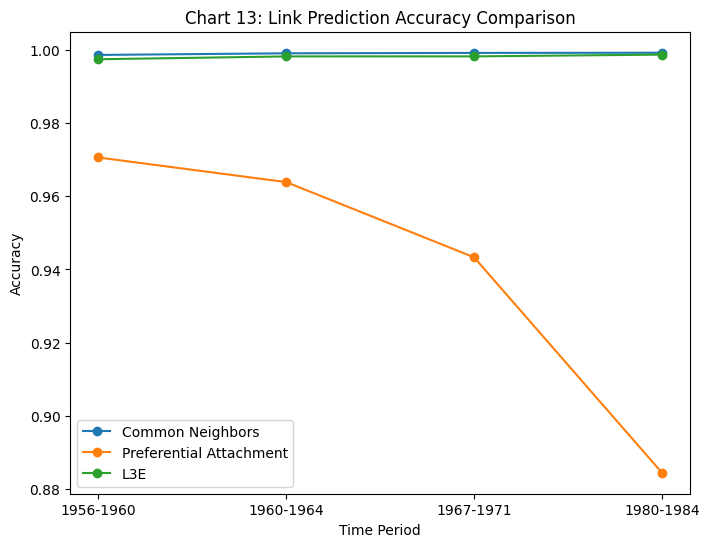

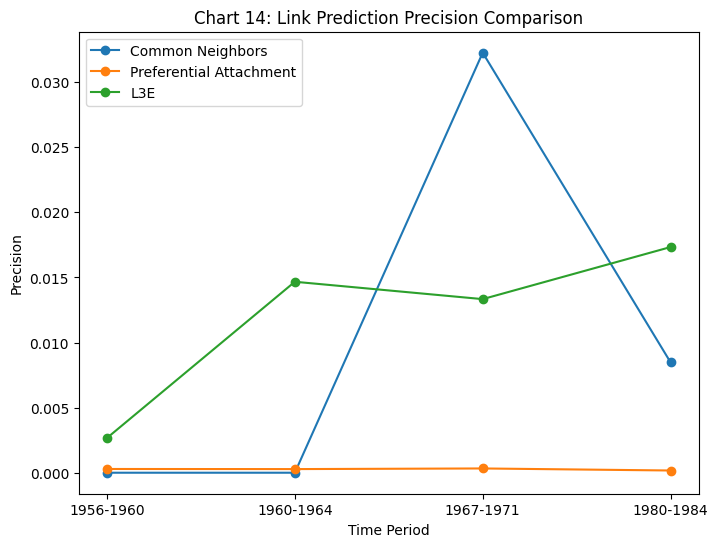

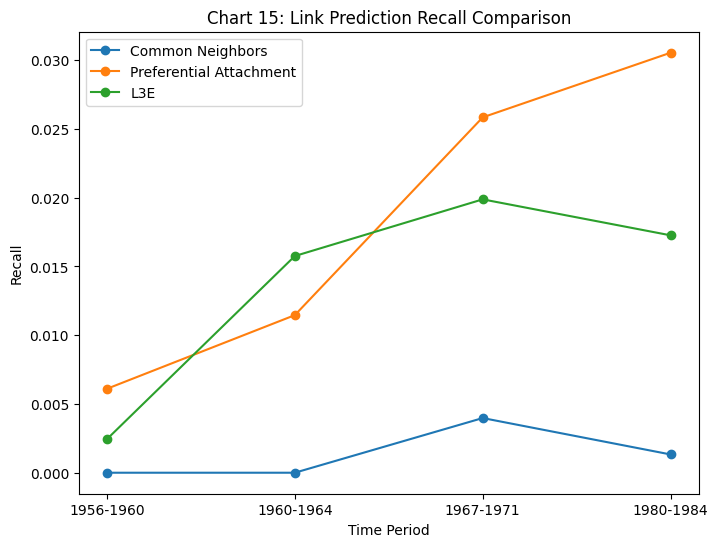

In [10]:
# Call the function for each metric
method_data_accuracy = plot_results(all_results, "accuracy", "13")
method_data_precision = plot_results(all_results, "precision", "14")
method_data_recall = plot_results(all_results, "recall", "15")

#### Interpretation of results

Our link prediction results across the different time periods demonstrate consistently high accuracy scores. However, precision and recall metrics are markedly low. The potential implications of this are that the high accuracy is deceptive due to an imbalance between the number of potential links that form (few) and those that do not (many). Because our model predicts \"non-edge\" most of the time and this is true, it leads to high accuracy scores but fails to identify most of the new connections.

The results could suggest that despite the dramatic physical separation imposed by the Berlin Wall, the underlying principles driving network growth might have remained consistent to some degree. However, the low precision and recall warrant a deeper investigation. The results indicate that our link prediction methods fail to pinpoint specific new links likely to form with high confidence. This does not suggest disproportionate change being introduced by the Berlin Wall but rather that our network model is not appropriate for the link prediction methods tested.

Given this, we are not able to gain any noteworthy insight into our historical research question, but we do have a new starting point from which to think about how link prediction could be used to understand our system. All metrics results indicate that the methods are unreliable for this use case. However, an alternative model may still be able to provide understanding of the underlying system. For a further iteration, building on the limitations we have seen here, we could use the geographic approach we used in 3.2. and group nodes into larger geographic items such as postcode areas. We would then have edges between postcode areas and could see if our results are improved by using a less fine-grained network model.